## Setup

In [1]:
import xarray as xr
import xesmf as xe
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_trans = '/home/glemieux/Data/luh2/transitions.nc'
file_state = '/home/glemieux/Data/luh2/states.nc'

In [3]:
trans = xr.open_dataset(file_trans,decode_times=False)
state = xr.open_dataset(file_state,decode_times=False)

## Pick a point in time to check

In [4]:
year = 1850
timeidx = year - 850
print("years since 850:",timeidx)

years since 850: 1000


## Get the transition rate for the given index

In [5]:
trans_strt = trans.isel(time=timeidx)

#### There should only be transition *away* from primary forest.  Manually check this.

In [6]:
trans_vars = list(trans_strt.variables)
not any('to_primf' in subname for subname in trans_vars)

True

#### Sum up only the `primf_to` transitions 

In [7]:
trans_strt_primf_to = 0.0
for i in range(len(trans_vars)):
    if ('primf_to' in trans_vars[i]):
        print("adding: {}".format(trans_vars[i]))
        trans_strt_primf_to = trans_strt_primf_to + trans_strt[trans_vars[i]]

# trans_strt_primf_to = -trans_strt_primf_to

adding: primf_to_secdn
adding: primf_to_urban
adding: primf_to_c3ann
adding: primf_to_c4ann
adding: primf_to_c3per
adding: primf_to_c4per
adding: primf_to_c3nfx
adding: primf_to_pastr
adding: primf_to_range


#### Add in the harvest rates

In [8]:
trans_strt_primf = -(trans_strt_primf_to + trans_strt.primf_harv)

## Calculate transition rates from the actual state data

In [9]:
state_primf_nextdiff = state.primf.isel(time=timeidx+1) - state.primf.isel(time=timeidx)
state_primf_prevdiff = state.primf.isel(time=timeidx) - state.primf.isel(time=timeidx-1)

#### Map the calculated transitions around the selected time index

Text(0.5, 1.0, 'Primary Forest - Previous Difference (1849->1850)')

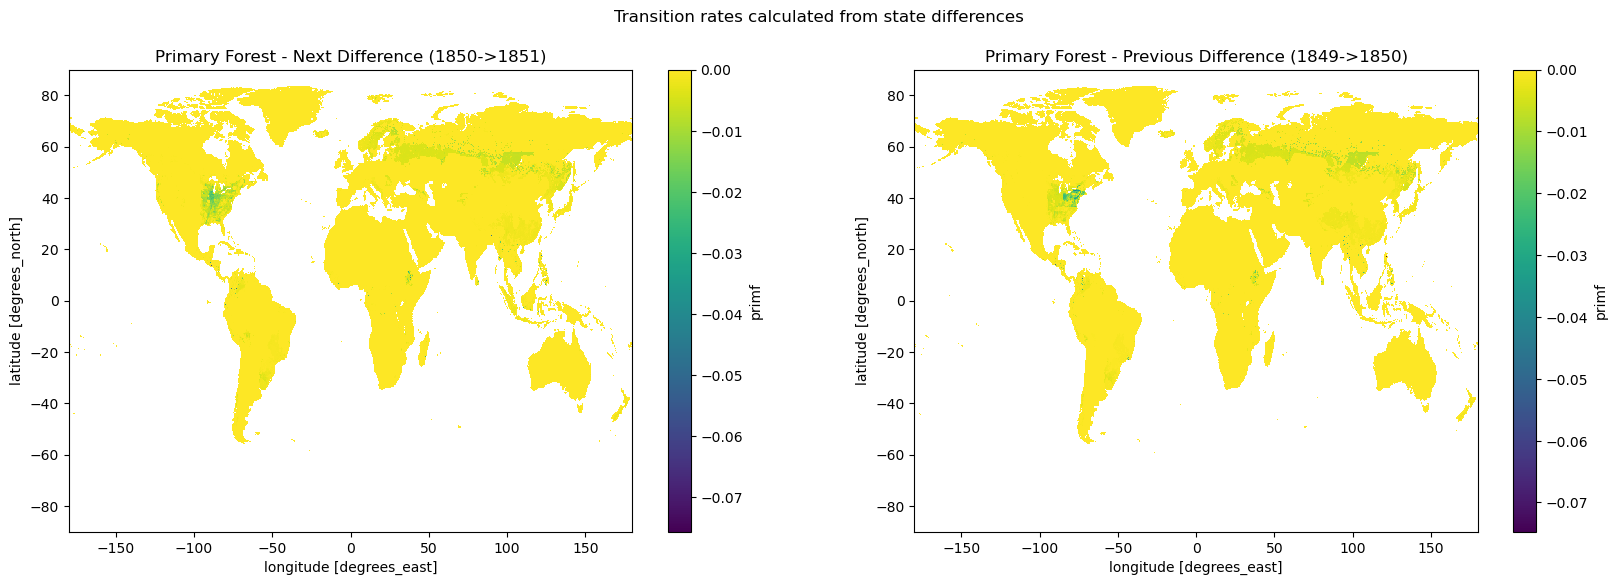

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,6))
fig.suptitle('Transition rates calculated from state differences')
state_primf_nextdiff.plot(ax=ax1)
state_primf_prevdiff.plot(ax=ax2)
ax1.set_title('Primary Forest - Next Difference (1850->1851)')
ax2.set_title('Primary Forest - Previous Difference (1849->1850)')

## Map out and visually compare the actual transition data and the calculated transition

#### Actual versus the 1850->1851 calculation

Text(0.5, 1.0, 'State Calculated - Next Diff (1850->1851)')

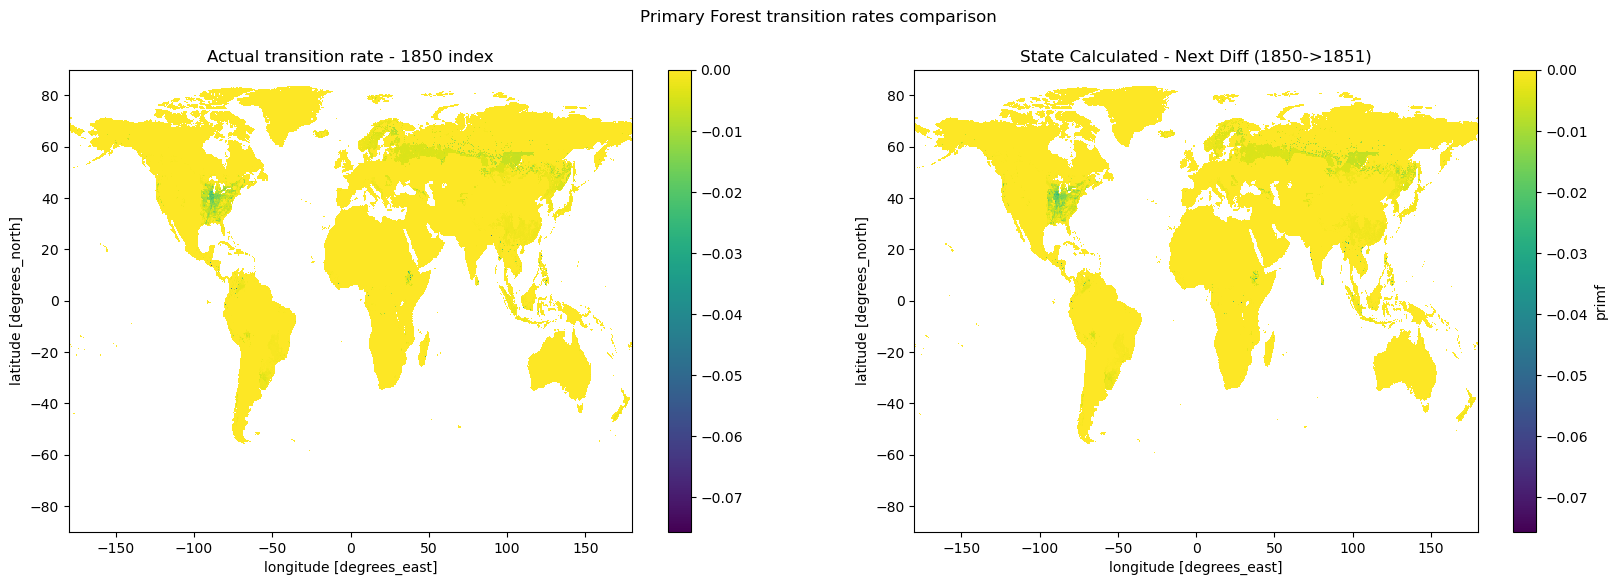

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,6))
fig.suptitle('Primary Forest transition rates comparison')
trans_strt_primf.plot(ax=ax1)
state_primf_nextdiff.plot(ax=ax2)
ax1.set_title('Actual transition rate - 1850 index')
ax2.set_title('State Calculated - Next Diff (1850->1851)')

The above plots look to have a very similar distibution pattern

#### Actual versus the 1849->1850 calculation

Text(0.5, 1.0, 'State Calculated - Prev Diff (1849->1850)')

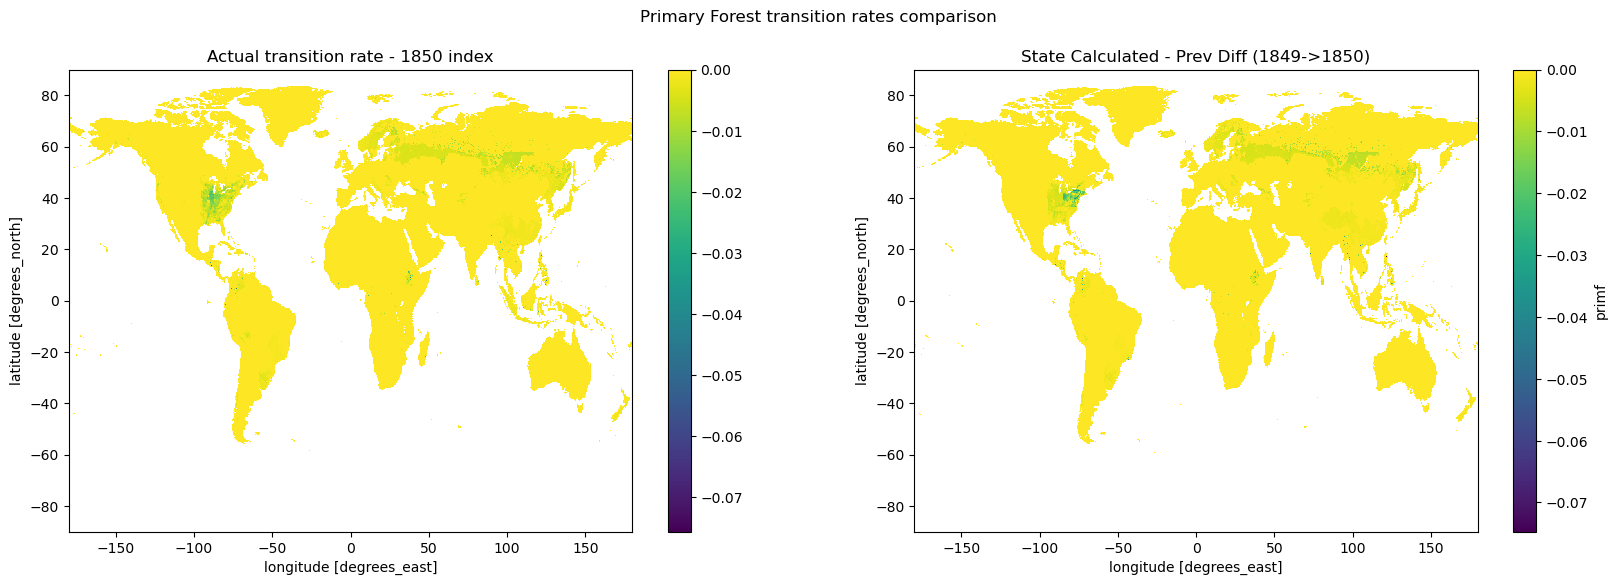

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,6))
fig.suptitle('Primary Forest transition rates comparison')
trans_strt_primf.plot(ax=ax1)
state_primf_prevdiff.plot(ax=ax2)
ax1.set_title('Actual transition rate - 1850 index')
ax2.set_title('State Calculated - Prev Diff (1849->1850)')

The above plots look fairly different compared to the previous set

## Map the differences of the above comparisons

Text(0.5, 1.0, 'Prev (1849->1850)')

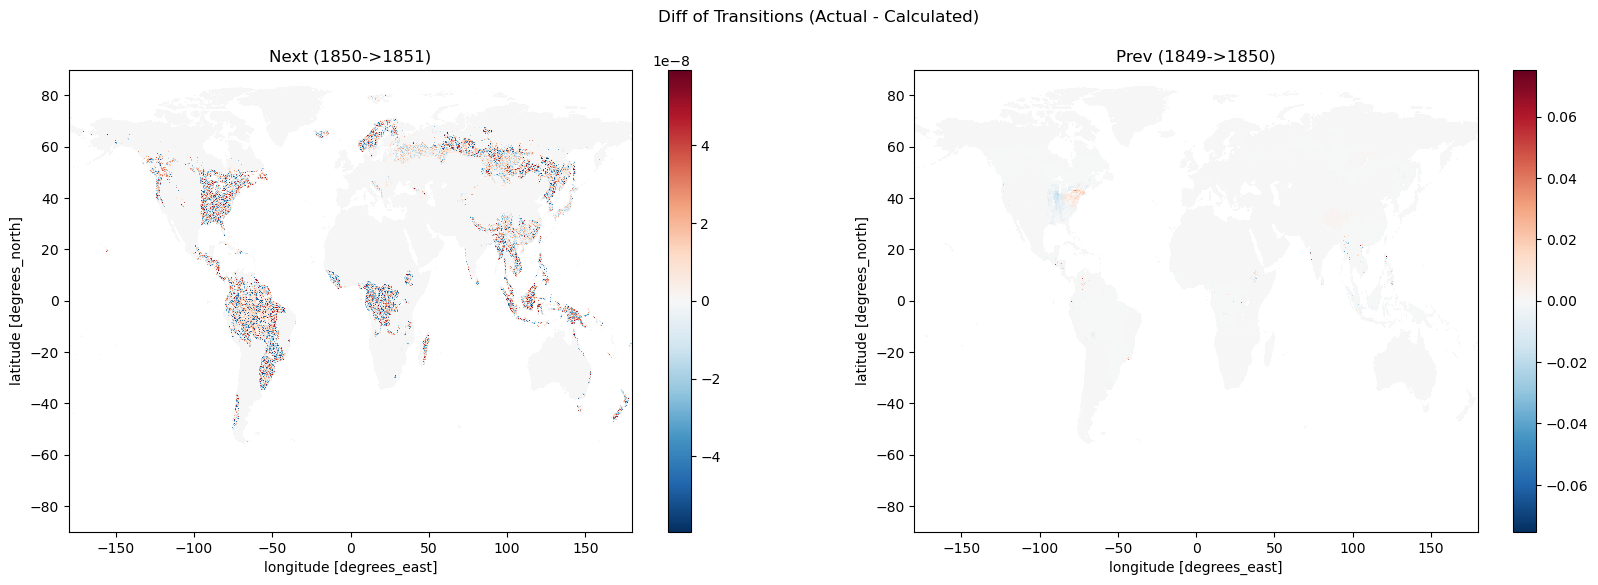

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,6))
fig.suptitle('Diff of Transitions (Actual - Calculated)')
(trans_strt_primf-state_primf_nextdiff).plot(ax=ax1)
(trans_strt_primf-state_primf_prevdiff).plot(ax=ax2)
ax1.set_title('Next (1850->1851)')
ax2.set_title('Prev (1849->1850)')

## Conclusion

The differences in "Next" are extremely small single precision floating point errors compared to "Prev".  **Thus the 1850 index is the transition rate happening during 1850, not leading into.**

The confirms that the language in the LUH2 FAQ (emphasis mine):
> "The land-use transitions give the fraction of each grid-cell that transitions one from land-use state to another **in a given year**" 